# Example 3.2: Newton incremental iteration scheme

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from bmcs.api import PullOutModel
import numpy as np

To demonstrate the idea of a non-linear solver even in simple terms, let us consider a known function defining the non-linear residuum. The principle assumption of the incremental time stepping scheme is that we know some initial value of the state variable that satisfies the governing equations, i.e. $R(u_0) = 0$.

Then, we assume to know the derivatives of the sought function with respect to the state variable $u$. The time stepping algorithm provides us a means how to travel through the space of state variables along an admissible path satisfying the governing equations. The director of the travel is the pseudo-time variable $t$.

In order to illustrate the concept, let us consider the simple function 
\begin{equation}
f(t)= \mathrm{sin}(u)
\end{equation}
Think of this equation as the equilibrium requirement of our mechanical model. On the left hand side, there is the prescribed history of loads $f(t)$. On the right hand side, the force of response of the structure. Now, for prescribed history on the right hand side $f(t)$, we want to find the corresponding history of displacements satisfying the equlibrium $u(t)$. 

Of course, we might solve this equation just by evaluating
\begin{align}
u = \arccos{f(t)}
\end{align}
But this is not possible in a general case of a discretized structure. 
We thus pretend, that the inversion of the function $\sin(u)$ is not available and define the residuum of the problem as
\begin{equation} \label{eq:residuum}
R = \mathrm{sin}(u) - f(t) = 0.
\end{equation}
In a numerical code, the values of the function $f(t)$ is given in incremental steps.
For each increment of $f(t)$ an iteration loop must be performed to find the value of $u$ satisfying the residuum.

To get the numerical algorithm, we first expand the residuum using the first two terms of the Taylor series as
\begin{align}
R(u^{k+1},t) = R(u^{k},t) + \left.\frac{ \partial R(u) }{ \partial u }\right|_{u^k} \Delta u^{k+1} = 0.
\end{align}

In the considered case of $\sin{u}$, the derivative of the residuum with respect to $u$ is calculated as
\begin{equation}
\left.\frac{ \partial R(u) }{ \partial u } \right|_{u^k} = \mathrm{cos}(u^k)
\end{equation}

The iteration loop can then be obtained by solving the expanded residuum for the  increment of the displacement  $\Delta u^{k+1}$ as
\begin{equation}
\Delta u^{k+1} = - \left[ \left.\frac{ \partial R(u) }{ \partial u }\right|_{u^k} \right]^{-1} R(u^k)
\end{equation}
The new value of the  variable $u$ can be given as
\begin{equation}
u^{k+1} = u^k + \Delta u^{k+1} 
\end{equation}

The last two equations are repeated until the residuum is (almost) zero.

## Sinus function as a pseudo model of a nonlinear structural response 

In [13]:
def f(u):
    return np.sin(u)

def df_du(u):
    return np.cos(u)

## Algorithm implementation
Note that the algorithm is implemented as a double loop. The outer loop defines the load levels. The inner loop iterates over the values of residuum until the residuum gets smaller than the required threshold value prescribing the accuracy of the calculation.

In [14]:
K_max = 100 # max number of iterations
u = 0.0 #  initial value of displacement
f_levels = np.linspace(0, 0.99999, 6) # prescribed load levels
u_levels = []  # calculated displacement values for each load level
for f_level in f_levels: # loop over the load levels
    for K in range(K_max): # iteration loop
        R = f(u) - f_level # value of the residuum
        if np.fabs(R) < 1e-8: # residuum equal to zero?
            break # stop iteration
        dR = df_du(u) # derivative of the residuum
        d_u = - R / dR # increment of displacement
        u += d_u # update the total displacement       
        if K == K_max - 1:
            raise ValueError('No convergence')
    print('number of iterations =',K)
    u_levels.append(u) # record the found solution for current load level f

number of iterations = 0
number of iterations = 3
number of iterations = 3
number of iterations = 3
number of iterations = 4
number of iterations = 10


## Print the obtained values

In [4]:
print('u', u_levels)
print('f', f_levels)

u [0.0, 0.20135587954930018, 0.4115124817003838, 0.6434936070044599, 0.9272818847867171, 1.5663241841617594]
f [0.       0.199998 0.399996 0.599994 0.799992 0.99999 ]


## Compare the obtained results with exact solution

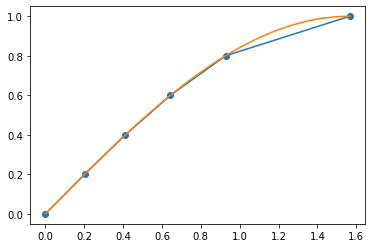

In [5]:
plt.plot(u_levels,f_levels,'o-')
u_analytical = np.linspace(0, u_levels[-1], 50)
plt.plot(u_analytical, f(u_analytical))

# Questions and tasks

### 1 What if the derivative is not available?
Is it possible to trace the $\sin(u)$ function even without the derivative? Sometimes it is difficult to obtain the derivative of the function so that other strategies are necessary. Examine the algorithm behavior by setting a value of the derivative, i.e.  $\partial f(u) / \partial u = \cos(0)$.

### 2 Can the algorithm trace the descending branch of the function?
Can the present algorithm trace the $\sin(u)$ function also in the range $u > \pi/2$. 
Why not?

### 4 Can the algorithm handle an infinite derivative?
Use the algorithm above to trace the function $\sqrt{u}$. Why doesn't it work? How to fix it.

In [6]:
def f(u):
    return np.sqrt(u)

def df_du(u):
    return 1./2./np.sqrt(u)

### 3 Can the algorithm handle a concave function?
Use the algorithm above to find the solution to the functions $u^2$. Why doesn't it work? How to fix it? Use the algorithm in combination with the function below.

In [7]:
def f(u):
    return u**2 + .5*u

def df_du(u):
    return 2*u + .5

### 5 Visualization of the iteration process
Apply an extnded version of the algorithm that records the iterations staps showing what the algorithm went through. Use the modified Newton method - using a constant derivative to see the all the loops that the algorithm went through. Don't forget to increase the number of iterations.

number of iterations = 0
number of iterations = 5
number of iterations = 4
number of iterations = 4
number of iterations = 3
number of iterations = 3


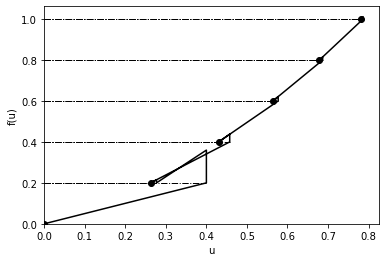

In [8]:
K_max = 100 # max number of iterations
u = 0.0 #  initial value of displacement
f_t = np.linspace(0, 0.99999, 6) # prescribed load levels
u_t = []  # calculated displacement values for each load level
f_t_iter = [0.0] 
u_t_iter = [0.0] # interim values of displacement
f_t_levels = [] # used for visualization of load levels
u_t_levels = [] # used for visualization of load levels
for f_level in f_t: # loop over the load levels
    for K in range(K_max): # iteration loop
        R = f(u) - f_level # value of the residuum
        if np.fabs(R) < 1e-8: # residuum equal to zero?
            break # stop iteration
        dR = df_du(u) # derivative of the residuum
        d_u = - R / dR # increment of displacement
        u += d_u # update the total displacement
        u_t_iter.append(u)# record data for visualization of iterations
        f_t_iter.append(f_level)
        u_t_iter.append(u) 
        f_t_iter.append(f(u))
        f_t_levels.append([f_level,f_level]) 
        u_t_levels.append([0,u]) 
        if K == K_max - 1:
            raise ValueError('No convergence')
    print('number of iterations =',K)
    u_t.append(u) # resord the found solution for current load level f
plt.plot(u_t, f_t, 'o', color='black', lw=2) # plot solved increments as bullets
plt.plot(u_t_iter, f_t_iter, color='black') # plot iterations as solid liness
plt.plot(np.array(u_t_levels).T, np.array(f_t_levels).T, '-.',  
                color='black', lw=1) # plot load levels as dash-dotted lines
plt.xlabel('u')
plt.ylabel('f(u)')
plt.xlim(0)
plt.ylim(0)
plt.show()

### 6 Solve the problem using the newton method provided in scipy

In [9]:
from scipy.optimize import newton

In [10]:
%pdoc newton